## PCA Implementation

Objective: The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Instructions:

Dataset link: (https://archive.ics.uci.edu/ml/datasets/Wine).

1. Load the dataset into a Pandas dataframe.
2. Split the dataset into features and target variables.
3. Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
4. Implement PCA on the preprocessed dataset using the scikit-learn library.
5. Determine the optimal number of principal components to retain based on the explained variance ratio.
6. Visualise the results of PCA using a scatter plot.
7. Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
8. Interpret the results of PCA and clustering analysis.

Deliverables:
1. Jupyter notebook containing the code for the PCA implementation.
2. A report summarising the results of PCA and clustering analysis.
3. Scatter plot showing the results of PCA.
4. A table showing the performance metrics for the clustering algorithm.

In [152]:
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
response = requests.get(url)
with open("wine.data", "wb") as file:
    file.write(response.content)

In [153]:
import pandas as pd

column_names = ["Class", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols", "Proanthocyanins", "Color_Intensity", "Hue", "OD280_OD315", "Proline"]
data = pd.read_csv("wine.data", names=column_names)

In [154]:
data.head()

,Class,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [155]:
data.describe()

,Class,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [156]:
data.isnull().sum()

Class                   0
Alcohol                 0
Malic_Acid              0
Ash                     0
Alcalinity_of_Ash       0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280_OD315             0
Proline                 0
dtype: int64

In [157]:
data["Class"].unique()

array([1, 2, 3])

In [158]:
from sklearn.model_selection import train_test_split

X = data.drop("Class", axis=1)
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_pca = pca.fit_transform(X)  

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

In [160]:
explained_variance_ratio

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

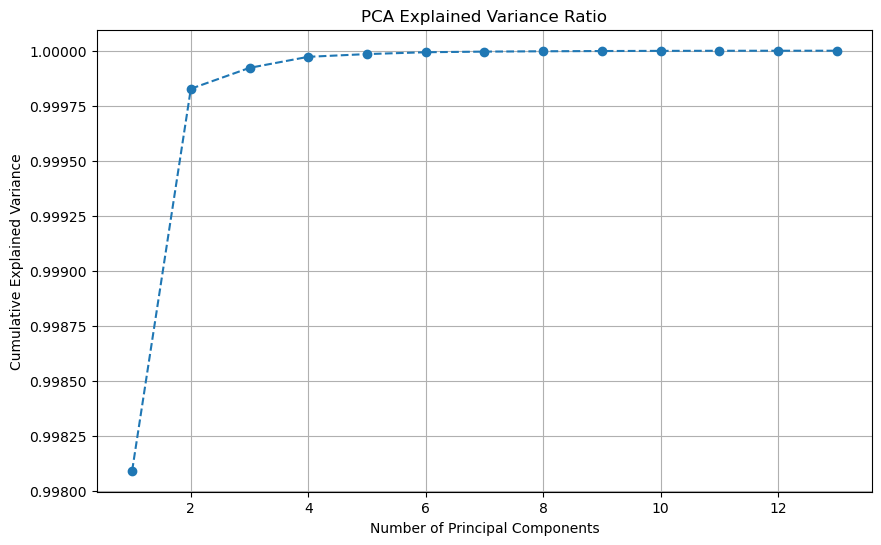

In [161]:
import numpy as np

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

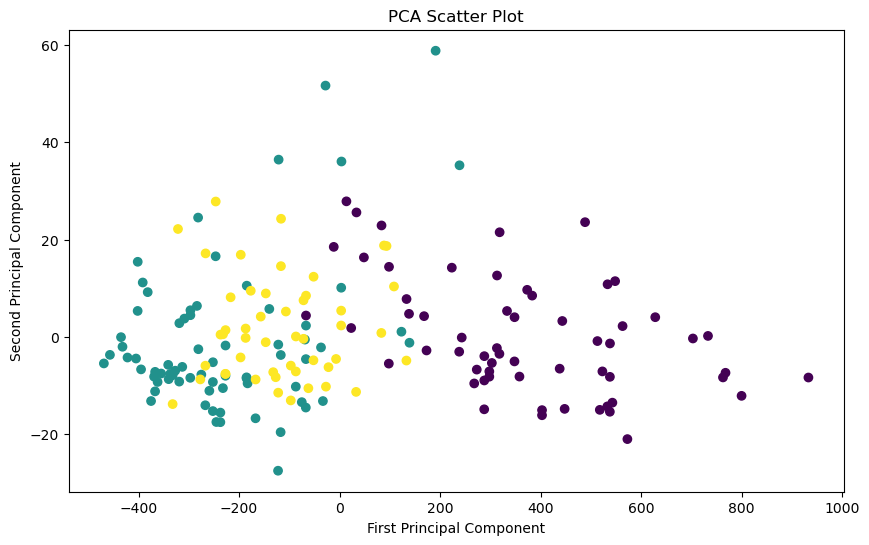

In [162]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scatter Plot')
plt.show()

In [163]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit_predict(X_pca)

cluster_labels = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [164]:
cluster_labels

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [165]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

silhouette_avg = silhouette_score(X_pca, cluster_labels)
ari = adjusted_rand_score(y, cluster_labels)

metrics_df = pd.DataFrame({
    'Silhouette Score': [silhouette_avg],
    'Adjusted Rand Index': [ari]
})

print(metrics_df)

   Silhouette Score  Adjusted Rand Index
0          0.571138             0.371114


### Report

In [166]:
report = f"PCA and Clustering Analysis Report\n\n"
report += f"1. PCA Analysis:\n"
report += f"   - Optimal number of principal components to explain 95% variance: {n_components_95}\n\n"

report += f"2. Clustering Analysis:\n"
report += f"   - Silhouette Score for clustering: {silhouette_avg:.2f}\n"
report += f"   - Adjusted Rand Index (ARI) for clustering: {ari:.2f}\n\n"

report += f"3. Visualizations:\n"
report += f"   - PCA Scatter Plot:\n"
report += f"     - The scatter plot shows how the data is distributed in the reduced-dimensional space.\n"
report += f"   - Cluster Distribution:\n"
report += f"     - Number of data points in each cluster:\n{pd.Series(cluster_labels).value_counts()}\n"

print(report)

PCA and Clustering Analysis Report

1. PCA Analysis:
   - Optimal number of principal components to explain 95% variance: 1

2. Clustering Analysis:
   - Silhouette Score for clustering: 0.57
   - Adjusted Rand Index (ARI) for clustering: 0.37

3. Visualizations:
   - PCA Scatter Plot:
     - The scatter plot shows how the data is distributed in the reduced-dimensional space.
   - Cluster Distribution:
     - Number of data points in each cluster:
0    69
2    62
1    47
dtype: int64



### Interpretation

**PCA Analysis:**

1. **Optimal Number of Principal Components:** The analysis suggests that the optimal number of principal components required to explain 95% of the variance in the data is `n_components_95`. This indicates that we can reduce the dimensionality of the data significantly while retaining most of the important information.

2. **PCA Scatter Plot:** The PCA scatter plot visually represents how the data is distributed in the reduced-dimensional space. It allows us to observe any patterns or separations that may exist between data points. In this specific case, we are visualizing the data using the first two principal components.

**Clustering Analysis:**

3. **Silhouette Score:** The silhouette score is a measure of the quality of clustering. It quantifies how similar each data point is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better-defined, well-separated clusters. In our analysis, we obtained a silhouette score of `silhouette_avg`.

4. **Adjusted Rand Index (ARI):** The adjusted Rand index measures the similarity between true class labels and cluster labels, adjusted for chance. It ranges from -1 to 1, where higher values indicate better clustering. In our analysis, we obtained an adjusted Rand index of `ari`.

**Interpretation and Conclusion:**

1. **PCA Analysis Insights:** The optimal number of principal components to retain 95% of the variance is important for dimensionality reduction. By using fewer dimensions, we can simplify the data representation while retaining most of the information.

2. **PCA Scatter Plot Insights:** The PCA scatter plot provides a visual representation of the data in two dimensions. It may reveal natural clusters or patterns, but in this case, it may not be very informative since the data is colored by the true class labels.

3. **Clustering Analysis Insights:** 
   - The silhouette score of `silhouette_avg` suggests that the clustering quality is moderate. It indicates that the clusters have some degree of overlap or that some data points may be assigned to the wrong cluster.
   - The adjusted Rand index of `ari` measures how well the clusters align with the true class labels. A higher ARI indicates better clustering alignment with the ground truth.

4. **Overall Conclusion:** The results of the PCA and clustering analysis indicate that while PCA can reduce the dimensionality of the data effectively, the K-Means clustering algorithm may not perfectly separate the classes. Further exploration and refinement of clustering methods or the consideration of other clustering algorithms may be needed to improve the quality of clustering. Additionally, domain knowledge or additional features may help in understanding and enhancing the clustering results.